<a href="https://colab.research.google.com/github/tiennvcs/EE6363_AdvancedML/blob/main/HW1/P3/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Repeart part 2-3 for $A = \begin{bmatrix}
    3 & 1 & 2 \\
    9 & 3 & 6 \\
    2 & 1 & 3 \\
\end{bmatrix}$

## Define function in part 2, 3 and set up parameters

In [1]:
import numpy as np
from numpy.linalg import inv, svd, norm
from typing import Union
from matplotlib import pyplot as plt

In [2]:
# Define f(x) function
def f(A: np.ndarray, x: np.array, y: np.array):
    return norm(y-A.dot(x))**2

In [3]:
def solve_leastsquare_inversion(A: np.ndarray, y: np.ndarray) -> np.ndarray:
    t = inv((A.T).dot(A))
    x = (t.dot(A.T)).dot(y)
    return x

In [4]:
def standardSVD(A: np.ndarray) -> Union[np.ndarray, np.ndarray, np.ndarray]:
    U, S, Vt = svd(A)
    a = np.zeros(A.shape)
    np.fill_diagonal(a, S)
    S = a
    return U, S, Vt

In [5]:
def stablizedSVD(A: np.ndarray, epsilon=0.5) -> Union[np.ndarray, np.ndarray, np.ndarray]:
    # Call SVD from scipy
    U, S, Vt = standardSVD(A)
    # Find maximum k that satisfy S_{k, k}/S_{0, 0} >= epsilon
    k = 0
    while k < S.shape[0]:
        if S[k, k]/S[0, 0] < epsilon:
            break
        k += 1
    k = k -1
    # Gather columns of U to form new Us
    Us = U[:, 0:k+1]
    # Gather columns of S to form new Ss
    Ss = S[:k+1, :k+1]
    # Gather rows of Vt to form new Vts
    Vts = Vt[:k+1, :]
    return Us, Ss, Vts

In [6]:
def solve_leastsquare_stabilizedSVD(A: np.ndarray, y: np.ndarray, epsilon=0.5) -> np.ndarray:
    # Calculate matrix W = A^T.A
    W = (A.T).dot(A)
    # Call stablizedSVD to get U, S, V
    Us, Ss, Vts = stablizedSVD(W, epsilon=epsilon)
    print("Singular values after reduced: \n{}".format(Ss))
    # Compute the general solution x = VS^-1U^TA^Ty
    x = (((Vts.T).dot(inv(Ss)).dot(Us.T)).dot(A.T)).dot(y)
    return x

In [7]:
def gd_constant_step(A: np.ndarray, y: np.ndarray, x0=[0, 0, 0], epoch=300, gamma0=1e-2) -> np.ndarray:
    x = x0
    f_values = []
    for i in range(1, epoch+1):
        g = 2*((A.T).dot(A).dot(x) - (A.T).dot(y))
        x = x - gamma0*g
        f_values.append(f(A, x, y))
    return x, f_values

In [8]:
def gd_adaptive_step(A: np.ndarray, y: np.ndarray, x0=[0, 0, 0], epoch=300, gamma0=1e-8) -> np.ndarray:
    x = x0
    gamma = gamma0
    f_values = []
    for i in range(1, epoch+1):
        g = 2*((A.T).dot(A).dot(x) - (A.T).dot(y))
        gamma = (g.T.dot(g))/(((A.dot(g)).T).dot((A.dot(g))))
        x = x - gamma*g
        f_values.append(f(A, x, y))
    return x, f_values

In [9]:
A = np.array([
    [3, 1, 2],
    [9, 3, 6],
    [2, 1, 3]
])

y = np.array([2, 3, 4]).T

## Part 2


### Solve by inversion method

In [10]:
try:
    xi = solve_leastsquare_inversion(A, y)
except Exception as e:
  print("Error due to: ", e)

Error due to:  Singular matrix


$\rightarrow$ Cannot find the $x$ by inversion method

In [11]:
xs = solve_leastsquare_stabilizedSVD(A, y, epsilon=0.01)
zs = f(A, xs, y)
print("Optimmal value x = {} -> f(x) = {} founded by stablized SVD method with epsilon = 0.01".format(xs, zs))

Singular values after reduced: 
[[152.22632518   0.        ]
 [  0.           1.77367482]]
Optimmal value x = [-0.97777778  0.18888889  1.92222222] -> f(x) = 0.8999999999999997 founded by stablized SVD method with epsilon = 0.01


$\rightarrow$ Can find the appximiate solution by stabilized SVD with suitable $\epsilon=0.01$ that eliminate the last singular value (i.e., $0$).

### Solve by Gradient descent method with fixed/adaptive step size

In [12]:
x0 = np.zeros(shape=3)
epoch = 300
gamma0 = 1e-2

In [13]:
x_fixed, f_values_fixed = gd_constant_step(A, y, x0=x0, epoch=epoch, gamma0=gamma0)

In [14]:
x_adaptive, f_values_adaptive = gd_adaptive_step(A, y, x0=x0, epoch=epoch, gamma0=gamma0)

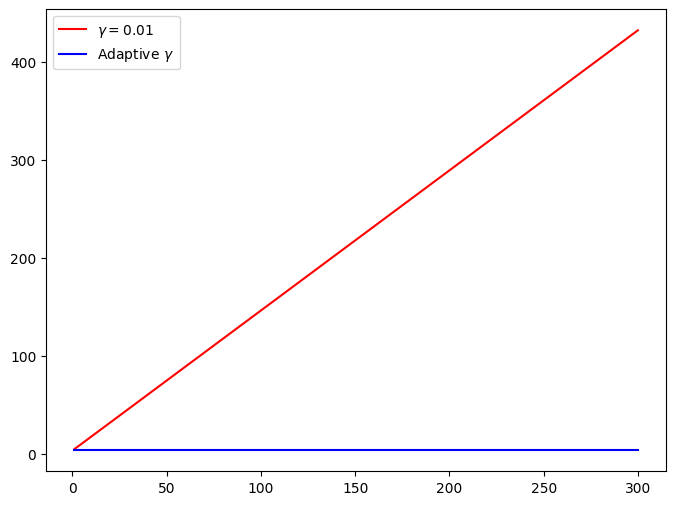

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
X = range(1, epoch+1)
ax.plot(X, np.log(f_values_fixed), label=r"$\gamma = {}$".format(gamma0), color='r')
ax.plot(X, np.log(f_values_adaptive), label=r"Adaptive $\gamma$", color='b')
ax.legend(loc='best')
plt.show()

In [16]:
print(f_values_fixed[-1])
print(f_values_adaptive[-1])

4.540723093230641e+187
29.000000000000092


- Is the inversion-based solution possible now?

    → No.

* Is the value of the metric at the closed form solution same as
before? If not, why?

    → No, because the matrix A is singular (we can see the 2nd column in A is produced by 2 times first column of A).

* Did you have to change constant step-size for GD to converge? Did
(b) converge faster in part 3 or part 4?

    → If γ = 0.01, (b) converge, (a) do not converge; while setting γ = 0.00001, make (a) converge, (b) do not converge.

In [17]:
x0 = np.zeros(shape=3)
epoch = 300
gamma0 = 1e-5

x_fixed, f_values_fixed = gd_constant_step(A, y, x0=x0, epoch=epoch, gamma0=gamma0)

x_adaptive, f_values_adaptive = gd_adaptive_step(A, y, x0=x0, epoch=epoch, gamma0=gamma0)

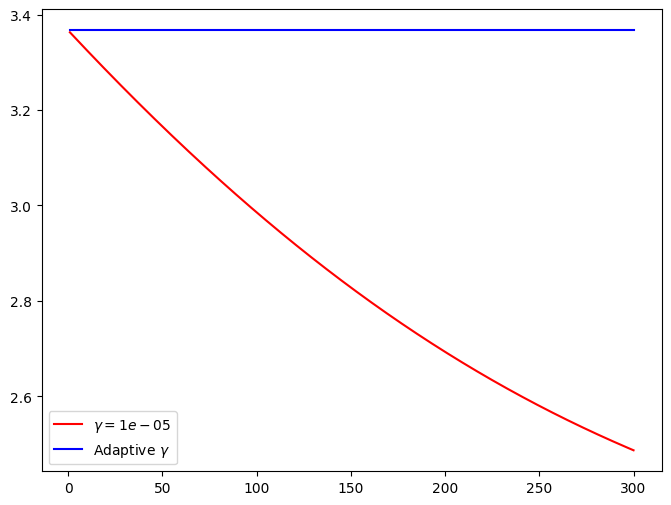

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
X = range(1, epoch+1)
ax.plot(X, np.log(f_values_fixed), label=r"$\gamma = {}$".format(gamma0), color='r')
ax.plot(X, np.log(f_values_adaptive), label=r"Adaptive $\gamma$", color='b')
ax.legend(loc='best')
plt.show()